In [4]:
import opendatasets as od

In [5]:
od.download('stackoverflow-developer-survey-2020')

Using downloaded and verified file: .\stackoverflow-developer-survey-2020\survey_results_public.csv
Using downloaded and verified file: .\stackoverflow-developer-survey-2020\survey_results_schema.csv
Using downloaded and verified file: .\stackoverflow-developer-survey-2020\README.txt


In [6]:
import pandas as pd

In [7]:
surver_raw_df = pd.read_csv('stackoverflow-developer-survey-2020\survey_results_public.csv')

<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
C:\Users\mayan\AppData\Local\Temp\ipykernel_14060\1396392722.py:1: SyntaxWarning: invalid escape sequence '\s'
  surver_raw_df = pd.read_csv('stackoverflow-developer-survey-2020\survey_results_public.csv')


In [8]:
surver_raw_df

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,64858,NaN,Yes,NaN,16,NaN,NaN,NaN,United States,NaN,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,NaN,NaN,10,Less than 1 year
64457,64867,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Morocco,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64458,64898,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Viet Nam,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64459,64925,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Poland,NaN,...,NaN,NaN,NaN,NaN,Angular;Angular.js;React.js,NaN,NaN,NaN,NaN,NaN


What are the columns present in the dataframe.

In [9]:
surver_raw_df.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'Age', 'Age1stCode', 'CompFreq',
       'CompTotal', 'ConvertedComp', 'Country', 'CurrencyDesc',
       'CurrencySymbol', 'DatabaseDesireNextYear', 'DatabaseWorkedWith',
       'DevType', 'EdLevel', 'Employment', 'Ethnicity', 'Gender', 'JobFactors',
       'JobSat', 'JobSeek', 'LanguageDesireNextYear', 'LanguageWorkedWith',
       'MiscTechDesireNextYear', 'MiscTechWorkedWith',
       'NEWCollabToolsDesireNextYear', 'NEWCollabToolsWorkedWith', 'NEWDevOps',
       'NEWDevOpsImpt', 'NEWEdImpt', 'NEWJobHunt', 'NEWJobHuntResearch',
       'NEWLearn', 'NEWOffTopic', 'NEWOnboardGood', 'NEWOtherComms',
       'NEWOvertime', 'NEWPurchaseResearch', 'NEWPurpleLink', 'NEWSOSites',
       'NEWStuck', 'OpSys', 'OrgSize', 'PlatformDesireNextYear',
       'PlatformWorkedWith', 'PurchaseWhat', 'Sexuality', 'SOAccount',
       'SOComm', 'SOPartFreq', 'SOVisitFreq', 'SurveyEase', 'SurveyLength',
       'Trans', 'UndergradMajor', 'WebframeDesireNextYear',
  

In [10]:
surver_raw_df.shape

(64461, 61)

In [11]:
schema_raw = pd.read_csv('stackoverflow-developer-survey-2020\survey_results_schema.csv', index_col = 'Column').QuestionText

<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
C:\Users\mayan\AppData\Local\Temp\ipykernel_14060\443953799.py:1: SyntaxWarning: invalid escape sequence '\s'
  schema_raw = pd.read_csv('stackoverflow-developer-survey-2020\survey_results_schema.csv', index_col = 'Column').QuestionText


In [12]:
schema_raw.shape

(61,)

Now we can we use schema_raw to retrive the full question.

In [13]:
schema_raw['YearsCodePro']

'NOT including education, how many years have you coded professionally (as a part of your work)?'

## Data Preparation & Cleaning

While the survey responses contain a wealth of information, we'll limit our analysis to the following areas:

- Demographics of the survey respondents and the global programming community
- Distribution of programming skills, experience, and preferences
- Employment-related information, preferences, and opinions

Let's select a subset of columns with the relevant data for our analysis.

In [14]:
selected_columns = [
    # Demographics
    'Country',
    'Age',
    'Gender',
    'EdLevel',
    'UndergradMajor',
    # Programming experience
    'Hobbyist',
    'Age1stCode',
    'YearsCode',
    'YearsCodePro',
    'LanguageWorkedWith',
    'LanguageDesireNextYear',
    'NEWLearn',
    'NEWStuck',
    # Employment
    'Employment',
    'DevType',
    'WorkWeekHrs',
    'JobSat',
    'JobFactors',
    'NEWOvertime',
    'NEWEdImpt'
]

In [15]:
survey_df = surver_raw_df[selected_columns].copy()

In [16]:
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 64072 non-null  object 
 1   Age                     45446 non-null  float64
 2   Gender                  50557 non-null  object 
 3   EdLevel                 57431 non-null  object 
 4   UndergradMajor          50995 non-null  object 
 5   Hobbyist                64416 non-null  object 
 6   Age1stCode              57900 non-null  object 
 7   YearsCode               57684 non-null  object 
 8   YearsCodePro            46349 non-null  object 
 9   LanguageWorkedWith      57378 non-null  object 
 10  LanguageDesireNextYear  54113 non-null  object 
 11  NEWLearn                56156 non-null  object 
 12  NEWStuck                54983 non-null  object 
 13  Employment              63854 non-null  object 
 14  DevType                 49370 non-null

In [17]:
survey_df['Age1stCode'] = pd.to_numeric(survey_df.Age1stCode, errors='coerce')
survey_df['YearsCode'] = pd.to_numeric(survey_df.YearsCode, errors='coerce')
survey_df['YearsCodePro'] = pd.to_numeric(survey_df.YearsCodePro, errors='coerce')

In [18]:
survey_df.describe()

,Age,Age1stCode,YearsCode,YearsCodePro,WorkWeekHrs
count,45446.000000,57473.000000,56784.000000,44133.000000,41151.000000
mean,30.834111,15.476572,12.782051,8.869667,40.782174
std,9.585392,5.114081,9.490657,7.759961,17.816383
min,1.000000,5.000000,1.000000,1.000000,1.000000
25%,24.000000,12.000000,6.000000,3.000000,40.000000
50%,29.000000,15.000000,10.000000,6.000000,40.000000
75%,35.000000,18.000000,17.000000,12.000000,44.000000
max,279.000000,85.000000,50.000000,50.000000,475.000000


Here we see that the minimum age is 1 and maximum age is 279. These are errors in  the surveys.  A simple fix would be to ignore the rows where the age is higher than 100 years or lower than 10 years as invalid survey responses. 

In [19]:
survey_df.drop(survey_df[survey_df.Age < 10].index, inplace=True)
survey_df.drop(survey_df[survey_df.Age > 100].index, inplace=True)

The same holds for `WorkWeekHrs`. Let's ignore entries where the value for the column is higher than 140 hours. (~20 hours per day).

In [20]:
survey_df.drop(survey_df[survey_df.WorkWeekHrs > 140].index, inplace=True)

The gender column also allows for picking multiple options. We'll remove values containing more than one option to simplify our analysis.

In [21]:
survey_df.Gender.value_counts()

Gender
Man                                                            45895
Woman                                                           3835
Non-binary, genderqueer, or gender non-conforming                385
Man;Non-binary, genderqueer, or gender non-conforming            121
Woman;Non-binary, genderqueer, or gender non-conforming           92
Woman;Man                                                         73
Woman;Man;Non-binary, genderqueer, or gender non-conforming       25
Name: count, dtype: int64

In [22]:
import numpy as np 

In [23]:
survey_df.where(~(survey_df.Gender.str.contains(';', na=False)), np.nan, inplace=True)

Now that we have cleared the dataset for our analysis, let's look at the dataset sample for some understanding.

In [24]:
survey_df.sample(10)

,Country,Age,Gender,EdLevel,UndergradMajor,Hobbyist,Age1stCode,YearsCode,YearsCodePro,LanguageWorkedWith,LanguageDesireNextYear,NEWLearn,NEWStuck,Employment,DevType,WorkWeekHrs,JobSat,JobFactors,NEWOvertime,NEWEdImpt
48593,Netherlands,25.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","A natural science (such as biology, chemistry,...",Yes,10.0,15.0,1.0,Bash/Shell/PowerShell;C++;Python,NaN,Once a decade,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,Academic researcher;Data scientist or machine ...,40.0,Very dissatisfied,Flex time or a flexible schedule;Specific depa...,Sometimes: 1-2 days per month but less than we...,Critically important
46060,Lithuania,32.0,Man,Primary/elementary school,NaN,No,14.0,6.0,6.0,Bash/Shell/PowerShell;Python,JavaScript,Once every few years,Visit Stack Overflow;Go for a walk or other ph...,Employed full-time,"DevOps specialist;Engineer, site reliability;S...",40.0,Slightly satisfied,"Languages, frameworks, and other technologies ...",Occasionally: 1-2 days per quarter but less th...,Not at all important/not necessary
35762,Brazil,24.0,Man,NaN,Web development or web design,Yes,19.0,6.0,2.0,Bash/Shell/PowerShell;C++;HTML/CSS;JavaScript;...,HTML/CSS;JavaScript;Python;SQL,Every few months,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,"Developer, back-end;Developer, front-end;Devel...",40.0,Very satisfied,"Languages, frameworks, and other technologies ...",Often: 1-2 days per week or more,Very important
9552,India,35.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Mathematics or statistics,Yes,18.0,5.0,4.0,C;C#;HTML/CSS;JavaScript;PHP,C;C++;HTML/CSS;JavaScript;PHP;Python,Once a year,Visit Stack Overflow;Watch help / tutorial vid...,"Independent contractor, freelancer, or self-em...","Academic researcher;Developer, QA or test",NaN,Slightly satisfied,Flex time or a flexible schedule;Remote work o...,Sometimes: 1-2 days per month but less than we...,Very important
34557,Canada,16.0,Man,"Secondary school (e.g. American high school, G...",NaN,Yes,12.0,4.0,NaN,C#;HTML/CSS;Java;JavaScript;Python;SQL,C++,Every few months,Play games;Visit Stack Overflow;Watch help / t...,Student,NaN,NaN,NaN,NaN,NaN,NaN
55173,Turkey,NaN,Man,"Secondary school (e.g. American high school, G...",NaN,No,17.0,3.0,NaN,C;C#;C++;Java,Python,Every few months,Play games;Call a coworker or friend;Visit Sta...,Student,NaN,NaN,NaN,Industry that I’d be working in;Remote work op...,NaN,NaN
40068,Colombia,31.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",No,15.0,14.0,11.0,Java;Kotlin;PHP,Java;Kotlin,Once a year,Play games;Call a coworker or friend;Go for a ...,Employed full-time,"Designer;Developer, back-end;Engineering manager",40.0,Slightly dissatisfied,How widely used or impactful my work output wo...,Often: 1-2 days per week or more,Very important
40996,Mongolia,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Student,NaN,NaN,NaN,NaN,NaN,NaN
26611,Bangladesh,23.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,19.0,4.0,NaN,PHP,PHP,Once a year,Visit Stack Overflow;Watch help / tutorial videos,"Not employed, but looking for work","Developer, back-end;Developer, front-end;Devel...",NaN,NaN,"Languages, frameworks, and other technologies ...",NaN,Very important
46868,Qatar,20.0,Man,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",Yes,9.0,4.0,NaN,C#;HTML/CSS;Java;JavaScript;Kotlin;PHP;Python;SQL,Haskell;Rust,Every few months,Visit Stack Overflow;Do other work and come ba...,"Not employed, but looking for work","Developer, back-end;Developer, front-end;Devel...",NaN,NaN,"Languages, frameworks, and other technologies ...",NaN,Very important


In [25]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt 
%matplotlib inline 

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [26]:
schema_raw.Country

'Where do you live?'

In [30]:
survey_df.Country.nunique()

183

In [43]:
top_countries = survey_df.Country.value_counts().head(15)
top_countries

Country
United States         12371
India                  8364
United Kingdom         3881
Germany                3864
Canada                 2175
France                 1884
Brazil                 1804
Netherlands            1332
Poland                 1259
Australia              1199
Spain                  1157
Italy                  1115
Russian Federation     1085
Sweden                  879
Pakistan                802
Name: count, dtype: int64

C:\Users\mayan\AppData\Local\Temp\ipykernel_14060\3559214741.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.index, y=top_countries, palette=colours)


<Axes: title={'center': 'Where do you live?'}, xlabel='Country', ylabel='count'>

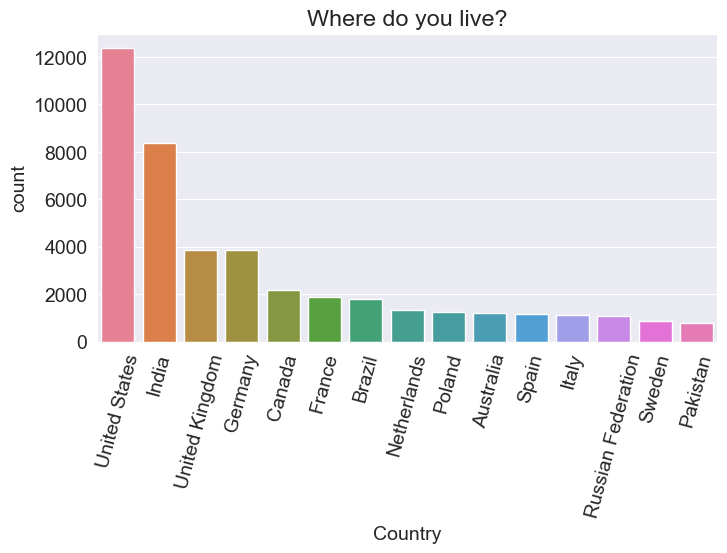

In [44]:
plt.figure(figsize=(8,4))
plt.xticks(rotation=75)
plt.title(schema_raw.Country)
colours = sns.color_palette('husl', n_colors=len(top_countries.index))
sns.barplot(x=top_countries.index, y=top_countries, palette=colours)

### Age

The distribution of respondents' age is another crucial factor to look at. We can use a histogram to visualize it.

(array([  209.,  2419.,  9135., 11938.,  8739.,  5582.,  3031.,  1756.,
         1038.,   622.,   333.,   143.,    75.]),
 array([10., 15., 20., 25., 30., 35., 40., 45., 50., 55., 60., 65., 70.,
        75.]),
 <BarContainer object of 13 artists>)

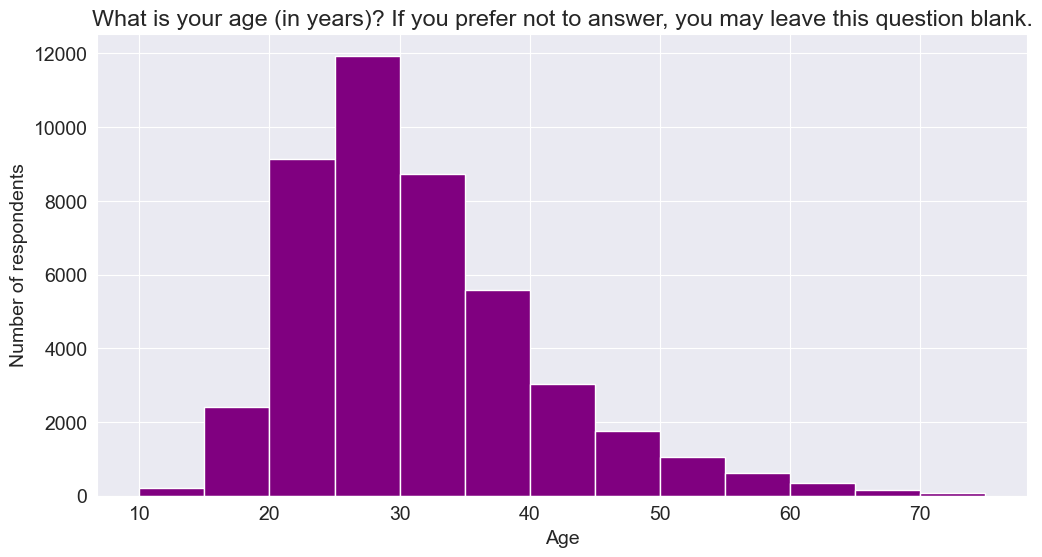

In [47]:
plt.figure(figsize=(12, 6))
plt.title(schema_raw.Age)
plt.xlabel('Age')
plt.ylabel('Number of respondents')

plt.hist(survey_df.Age, bins=np.arange(10,80,5), color='purple')

### Gender

Let's now look at the gender distribution for the responses.It's a well-known fact that women and non-binary genders are underrepresented in the programming community, so we might expect to see a skewed distribution here.

In [48]:
schema_raw.Gender

'Which of the following describe you, if any? Please check all that apply. If you prefer not to answer, you may leave this question blank.'

In [53]:
gender_counts = survey_df['Gender'].value_counts()
gender_counts

Gender
Man                                                  45895
Woman                                                 3835
Non-binary, genderqueer, or gender non-conforming      385
Name: count, dtype: int64

In [57]:
sns.set_style('whitegrid')

([<matplotlib.patches.Wedge at 0x1ec36ac0680>,
 [Text(1.0617335815722195, -0.28761398047005127, 'Man'),
  Text(-1.0544835403587842, 0.3131524598536697, 'Woman'),
  Text(-1.0996796455244597, 0.026545757084685317, 'Non-binary, genderqueer, or gender non-conforming')],
 [Text(0.5791274081303015, -0.1568803529836643, '91.6%'),
  Text(-0.5751728401957005, 0.17081043264745616, '7.7%'),
  Text(-0.5998252611951598, 0.014479503864373808, '0.8%')])

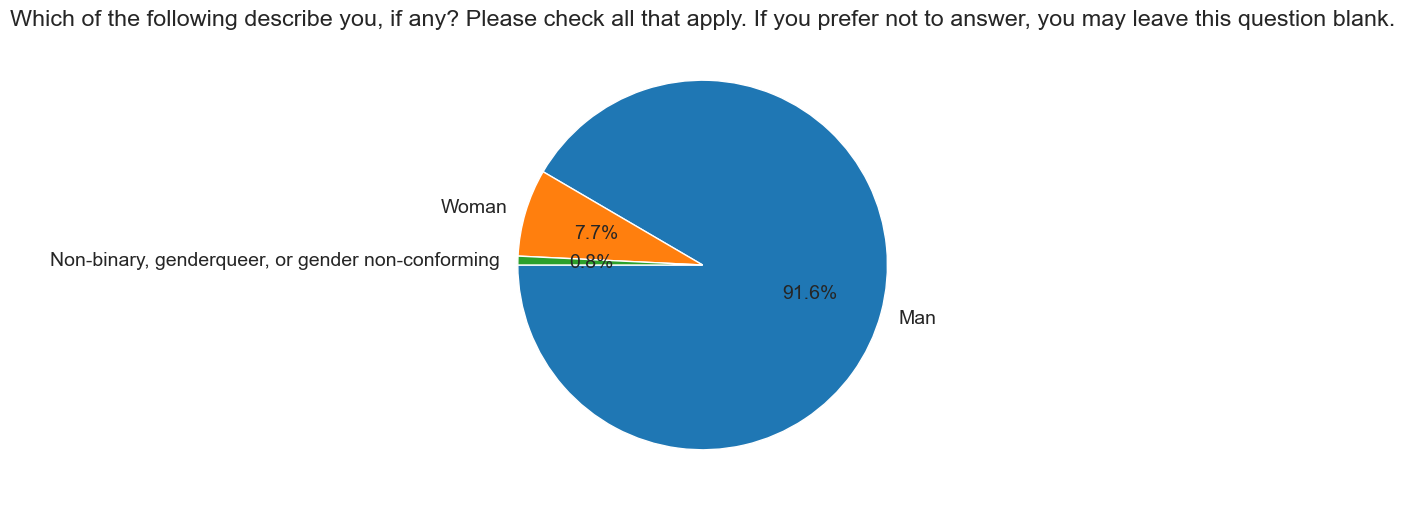

In [58]:
plt.figure(figsize=(8,6))
plt.title(schema_raw.Gender)
plt.pie(gender_counts, labels = gender_counts.index, autopct='%1.1f%%', startangle=180)

### Education Level

Formal education in computer science is often considered an essential requirement for becoming a programmer. However, there are many free resources & tutorials available online to learn programming. Let's compare the education levels of respondents to gain some insight into this. We'll use a horizontal bar plot here.

In [61]:
x = survey_df.EdLevel.value_counts()
x

EdLevel
Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                          26356
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                       13024
Some college/university study without earning a degree                                 7163
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)     4724
Associate degree (A.A., A.S., etc.)                                                    1831
Other doctoral degree (Ph.D., Ed.D., etc.)                                             1681
Primary/elementary school                                                               929
Professional degree (JD, MD, etc.)                                                      793
I never completed any formal education                                                  480
Name: count, dtype: int64

C:\Users\mayan\AppData\Local\Temp\ipykernel_14060\4117614091.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=survey_df.EdLevel, palette=colours_palette)


Text(0, 0.5, '')

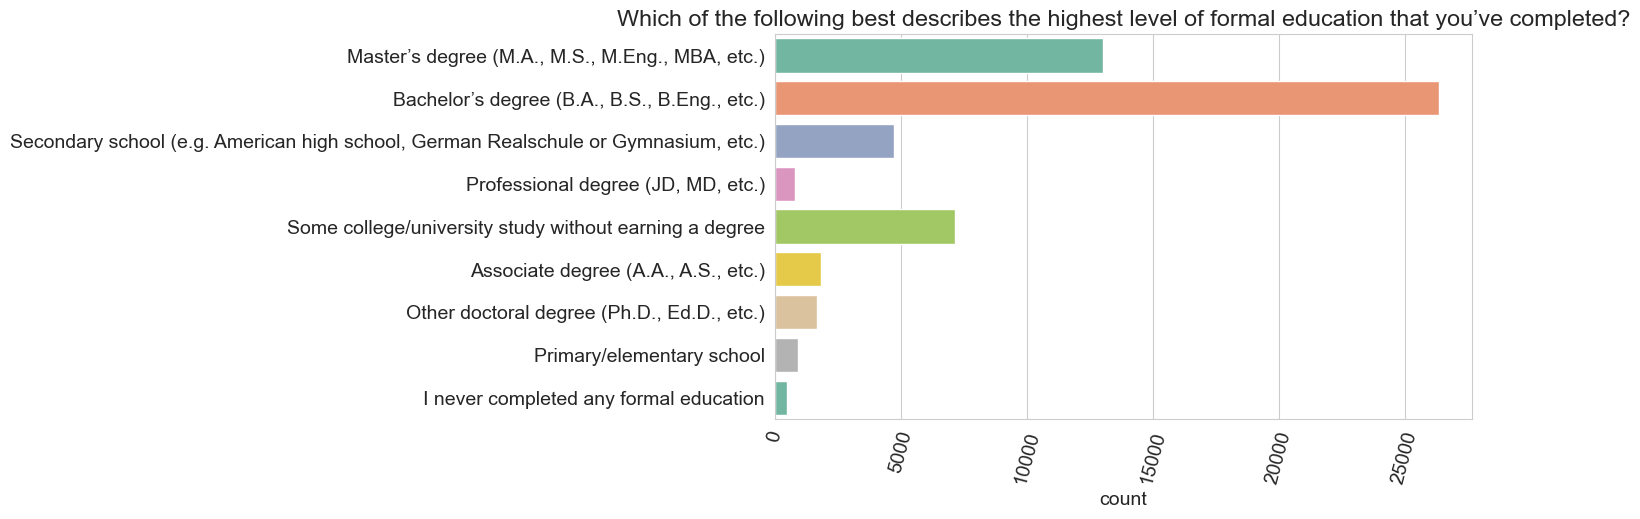

In [62]:
colours_palette = sns.color_palette('Set2', n_colors=len(x.index))
sns.countplot(y=survey_df.EdLevel, palette=colours_palette)
plt.xticks(rotation = 75)
plt.title(schema_raw.EdLevel)
plt.ylabel(None)

In [63]:
schema_raw.UndergradMajor

'What was your primary field of study?'

Text(0.5, 0, 'Percentage')

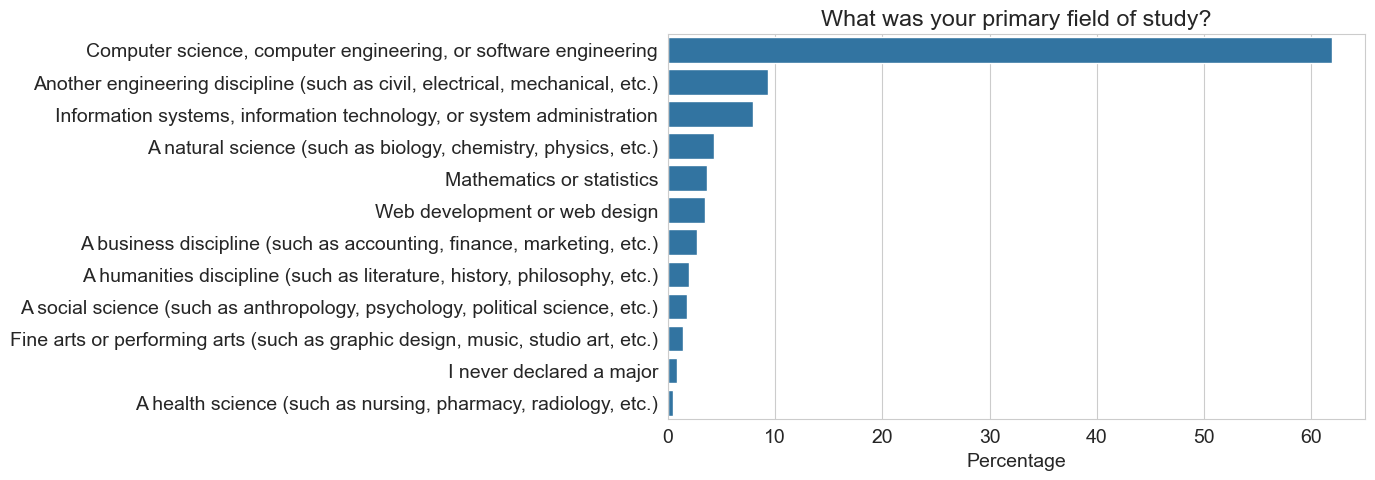

In [68]:
undergrad_pct = survey_df.UndergradMajor.value_counts() * 100 / survey_df.UndergradMajor.count()

sns.barplot(x=undergrad_pct, y=undergrad_pct.index)

plt.title(schema_raw.UndergradMajor)
plt.ylabel(None)
plt.xlabel('Percentage')

### Employement

In [69]:
schema_raw.Employment

'Which of the following best describes your current employment status?'

Text(0.5, 0, 'Percentage')

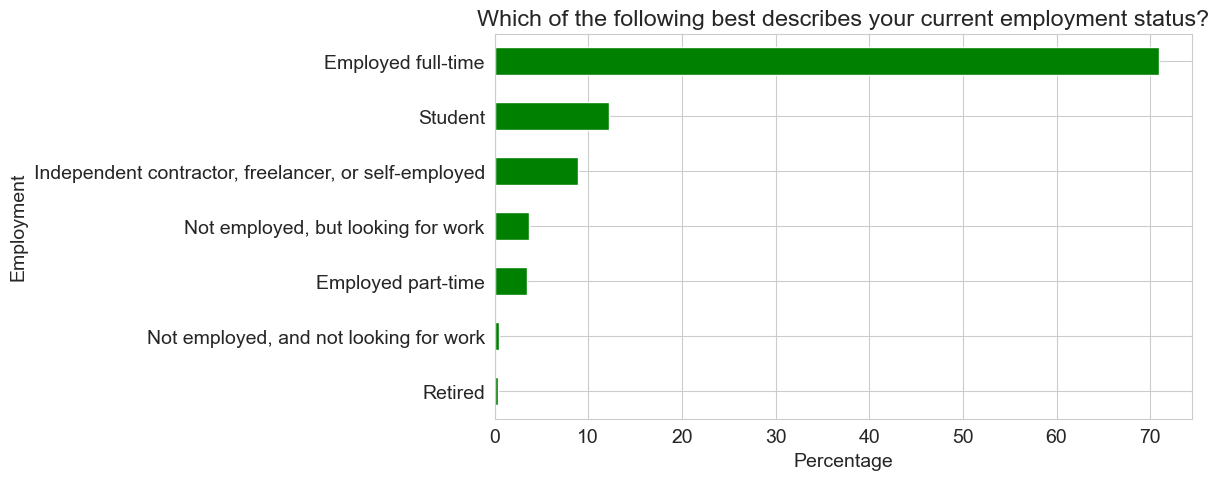

In [72]:
(survey_df.Employment.value_counts(normalize=True, ascending=True)*100).plot(kind='barh', color='g')
plt.title(schema_raw.Employment)
plt.xlabel('Percentage')